In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [2]:
# Read it in
path = "surveys_clean.csv"
df = pd.read_csv(path, na_filter=False)

# Drop unnecessary columns
df.drop(columns=['ind_id', 'subject_id', 'image_name', 'image_name_2', 'index','outfits','outfits_comment'], inplace=True)

In [3]:
df.shape

(5788, 2)

In [4]:
is_white = df['racial_group'] == 'white'
is_black = df['racial_group'] == 'black'
white = df[is_white]
black = df[is_black]

white = white['long']
black = black['long']

black = [i for i in black]
white = [i for i in white]

### Eigenvalues, spectral gap

In [5]:
embed = model.encode(white)
first = pd.DataFrame({'Response': white, 'Embedding': embed})
second = pd.DataFrame({'Response': white})

In [6]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x
    
second.iloc[:,1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,0.758591,0.456631,1.158288,-0.455719,-0.180095,1.283310,0.706048,0.358347,-0.999309,0.344630,...,-0.227195,0.462643,0.086750,-0.168338,-0.294847,-0.733800,-0.064139,1.485314,-0.084078,0.013112
1,0.309527,-0.083690,1.793920,-0.128317,0.171174,0.389611,-0.056813,0.341523,0.116591,-0.064351,...,0.549659,-0.103774,0.278531,0.671658,-0.126949,-0.480964,0.455517,0.225562,-0.091203,-0.032031
2,0.309527,-0.083690,1.793920,-0.128317,0.171174,0.389611,-0.056813,0.341523,0.116591,-0.064351,...,0.549659,-0.103774,0.278531,0.671658,-0.126949,-0.480964,0.455517,0.225562,-0.091203,-0.032031
3,0.454678,-0.536229,0.779319,0.193302,-0.092970,-0.065367,-0.889141,-0.867361,-0.364727,-0.262388,...,-0.091493,0.120037,0.284678,0.080229,-0.299972,-0.035708,-0.416625,0.467714,-0.377875,0.374595
4,0.422178,0.610620,-0.317593,0.041234,0.122884,0.505356,1.233452,0.438452,-0.306385,-0.208844,...,-0.180563,0.463026,1.149110,-1.301010,-1.116768,0.115643,-0.163776,0.072889,-0.872556,0.422105
5,0.309527,-0.083690,1.793920,-0.128317,0.171174,0.389611,-0.056813,0.341523,0.116591,-0.064351,...,0.549659,-0.103774,0.278531,0.671658,-0.126949,-0.480964,0.455517,0.225562,-0.091203,-0.032031
6,-0.170448,-0.680924,1.901574,0.523110,-0.252908,-0.436074,0.231396,-0.113363,-0.252537,-0.799451,...,-0.771372,-0.200827,0.274970,-1.376745,-0.996408,-0.065467,-0.677858,-0.443991,-0.864252,-0.829374
7,0.549441,-0.032283,0.780587,0.240238,-0.428685,-0.063074,0.501355,-0.903985,0.004191,0.049287,...,-0.264759,0.058556,-0.114252,-1.299849,-0.530832,-0.343054,-0.306447,0.633780,-0.793164,0.330236
8,0.004660,-0.301120,0.862109,0.273910,-0.373713,-0.793335,0.772640,0.344798,1.541640,-0.659954,...,0.481832,-0.242059,0.569427,-0.937235,-0.681376,0.322259,-0.742309,-1.169469,0.090096,-0.443329
9,0.799952,0.370300,0.983754,-0.038101,0.426844,-1.270377,0.507401,-1.155068,0.053498,-0.916051,...,-0.162249,-0.737028,0.351942,-0.329650,-0.667494,0.348835,0.448731,0.669346,-0.273538,0.238912


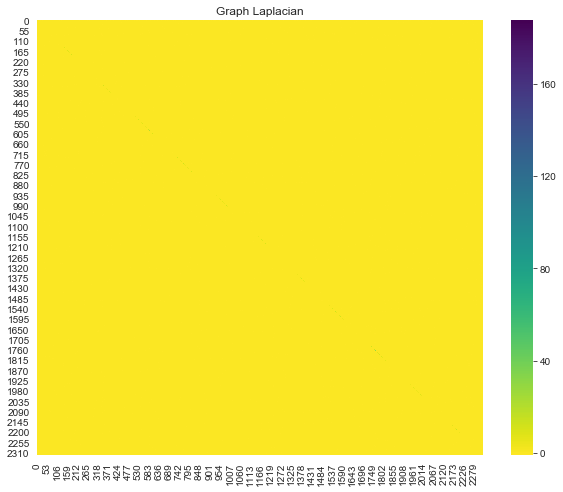

In [7]:
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=second.iloc[:,1:], nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [8]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

array([-1.47287728e-15, -4.44089210e-16,  0.00000000e+00,  4.44089210e-16,
        1.47287728e-15])

In [9]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [10]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 1.414213562394916
Max Norm: 48.2078831727758


In [11]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

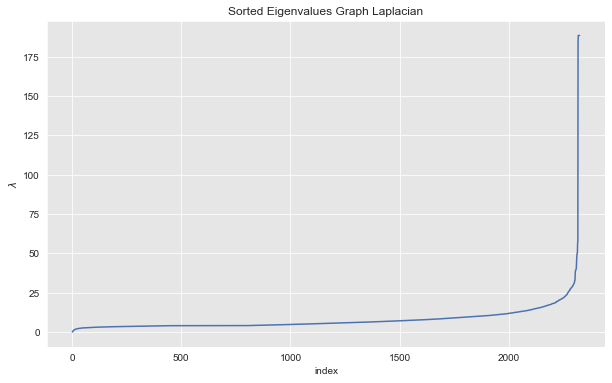

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

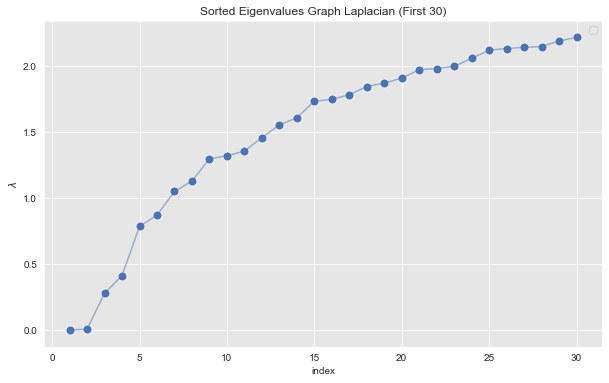

In [13]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

## -- 5 Clusters -- 

### TFIDF step

In [24]:
n=9

from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=n,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())

In [25]:
g = first.groupby('Cluster')
g.size().head()

Cluster
0    1261
1     214
2      23
3     369
4      77
dtype: int64

In [26]:
pd.Series(first.bag[0]).value_counts()

have         1
no           1
i            1
comments.    1
dtype: int64

In [27]:
import re
import itertools

TF = first.bag.apply(lambda bag : pd.Series(bag).value_counts())

clusters = g.bag.aggregate(lambda listofbags: list(itertools.chain.from_iterable(listofbags)))
clusters

Cluster
0    [to, maney, questions, a, like, in, the, last,...
1    [i, don't, know, why, you, put, color, people,...
2    [i, have, no, comments., no, quistens, to, be,...
3                                         [----, ----]
4    [some, question, overlap, others, and, you, mi...
5    [let's, get, something, done, about, prosecuti...
6    [i, think, this, questionnaire, is, a, very, g...
7    [i, think, its, a, good, idea, it, shows, the,...
8    [only, that, they, be, not, wasted., if, i, wi...
Name: bag, dtype: object

In [28]:
TF = clusters.apply(lambda bag : pd.Series(bag).value_counts())

In [29]:
IDF = np.log(len(TF)/TF.count())
IDF.sort_values()

thing           0.117783
this            0.117783
will            0.117783
not             0.117783
they            0.117783
any             0.117783
for             0.117783
that            0.117783
think           0.117783
is              0.117783
very            0.117783
and             0.117783
a               0.117783
i               0.117783
to              0.117783
be              0.117783
every           0.251314
good            0.251314
little          0.251314
don't           0.251314
question        0.251314
am              0.251314
what            0.251314
an              0.251314
&               0.251314
the             0.251314
never           0.251314
its             0.251314
out             0.251314
from            0.251314
                  ...   
shoes.          2.197225
6th             2.197225
comb            2.197225
changed?        2.197225
thanx           2.197225
entry           2.197225
leniency        2.197225
patriotism      2.197225
"glory"         2.197225


In [30]:
TFIDF = TF * IDF

final = TFIDF.fillna(0)
np.argsort(np.array(final.loc[2]))[-4:]
np.argsort(np.array(final.loc[0]))[-4:]

(final.loc[:0].values.tolist())[0]

[985.9065021459949,
 291.1596641425799,
 287.6261730728884,
 253.11574362556806,
 468.1987798873282,
 208.0048409691732,
 425.97795593613597,
 148.75997403401232,
 126.38119725929946,
 122.14100797566964,
 106.47586423337064,
 223.92115559828738,
 339.3742954865336,
 98.58440084439295,
 184.71610478646602,
 170.8938112310162,
 393.2292788195177,
 78.20793567583861,
 163.354378382589,
 368.5422388936287,
 73.61439728523966,
 367.3666655638244,
 139.228193267622,
 310.939145733221,
 60.65826336303748,
 125.65721414045308,
 121.63618328795859,
 193.81232167570258,
 113.09149272640778,
 263.91621254105144,
 178.81011267570048,
 164.21336878380657,
 158.53685727029227,
 151.2384853243453,
 148.80569467569632,
 43.22637408589273,
 143.94011337839837,
 86.70347775691263,
 136.23627632434324,
 80.92324590645178,
 80.16930262160906,
 127.72150905407179,
 126.5051137297473,
 117.99034645947583,
 170.45813282161453,
 68.35752449240648,
 108.66464897298806,
 106.23185832433907,
 64.58780806819289,

### dataframe

In [31]:
listoflists = []
for i in range(0, 4):
    listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])

In [32]:
[(final.loc[:8].values.tolist())[0][j] for j in list(np.argsort(np.array(final.loc[:8].values.tolist())[0])[-4:])]


[393.2292788195177, 425.97795593613597, 468.1987798873282, 985.9065021459949]

In [33]:
dictionary = pd.DataFrame({'Cluster': range(0, 4), 'Individual Dictionary': listoflists})
dictionary

,Cluster,Individual Dictionary
0,0,"[army, of, in, the]"
1,1,"[in, white, the, negro]"
2,2,"[quistens, none, comments., none.]"
3,3,"[relations, dissatisfaction, 64, ----]"
